# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
986,2025-12-26,37,35,31,88.571429,11.428571,61.1400,easy,2025-12-26
987,2025-12-27,34,31,28,90.322581,9.677419,231.8010,medium,2025-12-27
988,2025-12-28,41,39,32,82.051282,17.948718,110.3700,medium,2025-12-28
989,2025-12-29,42,40,36,90.000000,10.000000,58.2095,easy,2025-12-29


In [3]:
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
986,2025-12-26,37,35,31,88.571429,11.428571,61.1400,easy,2025-12-26
987,2025-12-27,34,31,28,90.322581,9.677419,231.8010,medium,2025-12-27
988,2025-12-28,41,39,32,82.051282,17.948718,110.3700,medium,2025-12-28
989,2025-12-29,42,40,36,90.000000,10.000000,58.2095,easy,2025-12-29


How many people are playing Reflect?

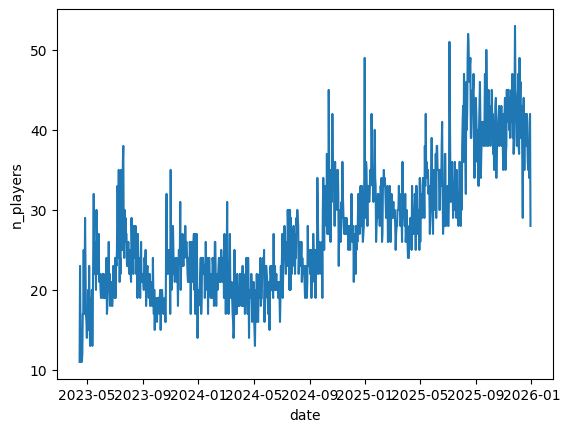

In [4]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [5]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

2698

## Features

In [6]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2025-12-26,37,35,31,88.571429,11.428571,61.1400,easy,2025-12-26,puzzle-2025-12-26.txt,...,6.500000,9,26,4,0,2,1,8,5,NaN
987,2025-12-27,34,31,28,90.322581,9.677419,231.8010,medium,2025-12-27,puzzle-2025-12-27.txt,...,4.285714,9,30,4,0,4,2,10,5,NaN
988,2025-12-28,41,39,32,82.051282,17.948718,110.3700,medium,2025-12-28,puzzle-2025-12-28.txt,...,4.166667,8,25,2,0,2,1,8,5,NaN
989,2025-12-29,42,40,36,90.000000,10.000000,58.2095,easy,2025-12-29,puzzle-2025-12-29.txt,...,5.400000,7,27,6,0,2,1,10,5,NaN


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

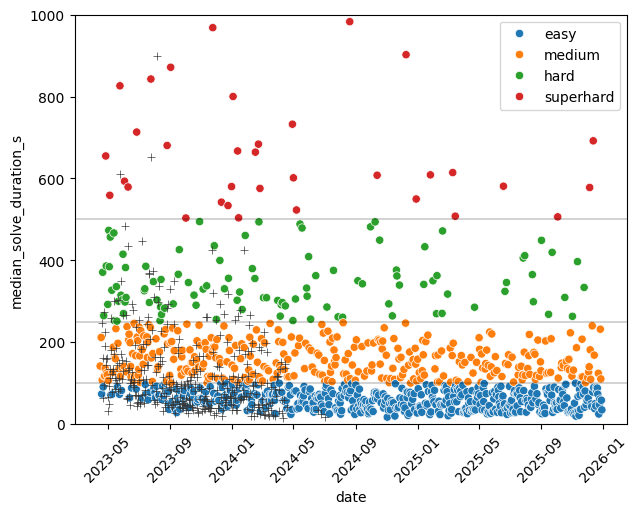

In [7]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

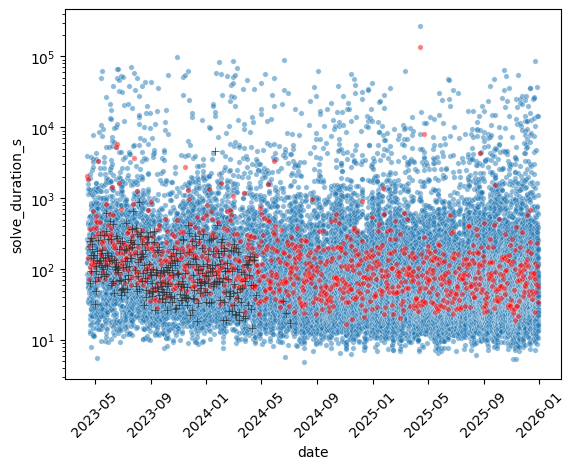

In [8]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

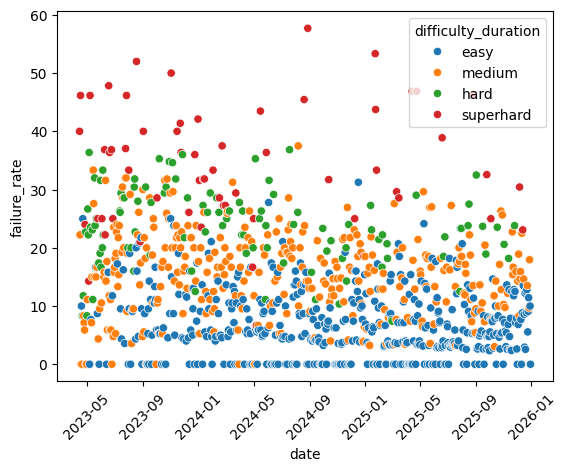

In [9]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [10]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [11]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [12]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.163151,0.042537,0.016073,0.023119,0.009978,0.008445,-0.005666,0.005472,0.009345,0.028274,-0.014856,0.004613,0.066464,0.050076,0.033952,0.037949,0.060763
failure_rate,0.163151,1.000000,0.158054,0.073290,0.160275,0.098197,0.113041,0.166165,0.118952,0.175795,0.247868,-0.003889,-0.033852,0.191601,0.187232,0.279855,0.126928,0.123785
max_beam_distance,0.066464,0.191601,-0.087850,-0.145070,-0.156702,0.013075,0.003829,0.209812,-0.158227,-0.128871,-0.164631,-0.013147,0.337998,1.000000,0.293477,0.582590,0.017136,-0.134213
num_excess_reflection_beams,0.060763,0.123785,0.243772,-0.002895,0.028497,0.285096,0.333248,-0.069659,0.080430,0.189607,0.206673,0.164364,-0.022204,-0.134213,0.063864,-0.080914,0.765848,1.000000
total_beam_distance,0.050076,0.187232,0.195787,0.079919,0.353051,0.291844,-0.101136,0.123917,0.077333,0.207664,0.003534,0.288390,0.253309,0.293477,1.000000,0.298567,0.091446,0.063864
num_blocks,0.042537,0.158054,1.000000,0.016571,0.111745,0.466099,0.392196,0.096504,0.421114,-0.120372,0.083670,0.053981,-0.010226,-0.087850,0.195787,-0.119475,0.254129,0.243772
excess_reflections,0.037949,0.126928,0.254129,-0.157358,-0.096690,0.412366,0.395801,0.274762,-0.041834,0.079652,-0.006240,0.251873,0.128332,0.017136,0.091446,-0.017431,1.000000,0.765848
excess_beam_distance,0.033952,0.279855,-0.119475,-0.212096,-0.088763,0.214048,0.118895,0.154114,0.037612,0.070260,-0.062638,0.146569,0.268150,0.582590,0.298567,1.000000,-0.017431,-0.080914
max_beams_per_block,0.028274,0.247868,0.083670,0.434900,0.592458,-0.145643,-0.021982,0.075958,0.305383,0.634942,1.000000,-0.243249,-0.597449,-0.164631,0.003534,-0.062638,-0.006240,0.206673
num_beams,0.023119,0.160275,0.111745,0.802832,1.000000,-0.097768,-0.426668,0.001795,0.217374,0.736555,0.592458,0.237475,-0.791263,-0.156702,0.353051,-0.088763,-0.096690,0.028497


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
np.random.seed(42)

In [15]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [16]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [17]:
response_variable = "median_solve_duration_s"

In [18]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

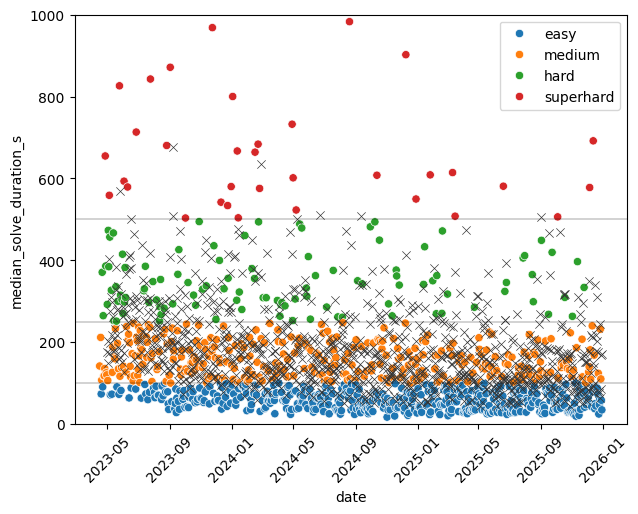

In [19]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');